Alistair Kiernan

December 5, 2023

Intensive Data Science II

# World Suicide Rate, Intentional Homicide Rate, GDP per capita, Comparison Data

The following code is an analyzation of worldwide GDP per capita, Intentional homicide rates, and suicide mortality rates data.

https://www.kaggle.com/datasets/prasertk/homicide-suicide-rate-and-gdp

# Contents 

1. [GDP compared to Suicide Mortality Rate](#GDP-compared-to-Suicide-Mortality-Rate)

2. [US Suicide Mortality Rate by Year](#US-Suicide-Mortality-Rate-by-Year)

3. [US & Albania Subplot of Intented Homicide Rate by Year](#US-&-Albania-Subplot-of-Intented-Homicide-Rate-by-Year)
4. [Intentional Homicide Rate(per 100,0000 people) in the year 2000 by country](#Intentional-Homicide-Rate(per-100,0000-people)-in-the-year-2000-by-country)


In [1]:
import pandas as pd

In [2]:
from scipy import stats

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("suic.csv")
df

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,NaN,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,NaN,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,NaN,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,NaN,14.1,1.928429e+10,3783.547898,Sub-Saharan Africa (excluding high income),Lower middle income


In [6]:
df.describe()

,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)"
count,13566.000000,3840.000000,4620.000000,1.139600e+04,7238.000000
mean,1995.000000,8.044086,10.545263,1.256303e+12,14326.351258
std,14.720144,12.180537,8.260847,5.353085e+12,17677.847021
min,1970.000000,0.000000,0.000000,8.824448e+06,285.404911
25%,1982.000000,1.356422,5.400000,2.935639e+09,2875.298395
50%,1995.000000,3.408601,8.500000,2.136323e+10,7525.316313
75%,2008.000000,9.247258,13.200000,2.583568e+11,18717.529628
max,2020.000000,141.722580,92.600000,8.756805e+13,153563.910960


## GDP compared to Suicide Mortality Rate 

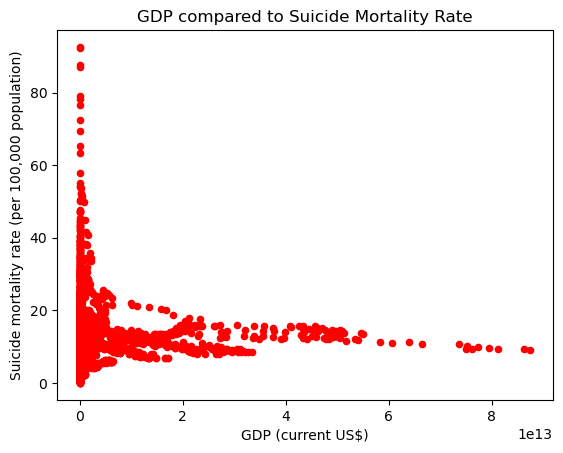

In [7]:
df.plot.scatter(x='GDP (current US$)',y='Suicide mortality rate (per 100,000 population)', color='red')
plt.title("GDP compared to Suicide Mortality Rate")
plt.show()

## US Suicide Mortality Rate by Year

In [8]:
df_usa = df[df['country']=='United States']

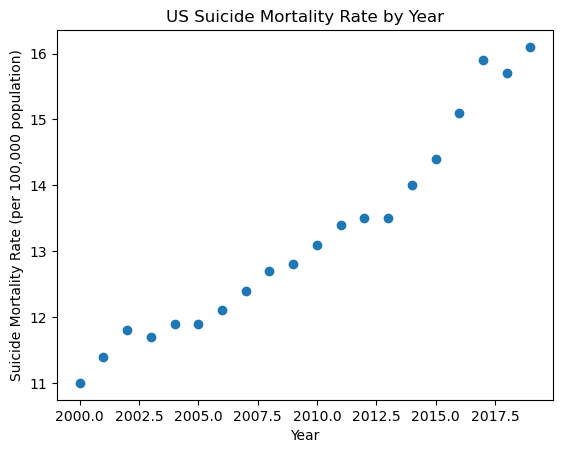

In [9]:
fig, ax = plt.subplots()
X = df_usa["year"]
Y = df_usa["Suicide mortality rate (per 100,000 population)"]
ax.scatter(X, Y)

plt.xlabel("Year")
plt.ylabel("Suicide Mortality Rate (per 100,000 population)")
plt.title("US Suicide Mortality Rate by Year")
plt.show()

In [10]:
stats.pearsonr(X.loc[12933:12952], Y.loc[12933:12952])

(0.9736161073441437, 5.347067116761833e-13)

The PearsonRResult tests for correlation between x and y axis, and as you can see above there is a clear correlation as the United States Suicide Mortality Rate increases over time. This evident correlation is why the PersonalRResult statistic is so high.

## US & Albania Subplot of Intented Homicide Rate by Year

In [11]:
df_alb = df[df['country']=='Albania']

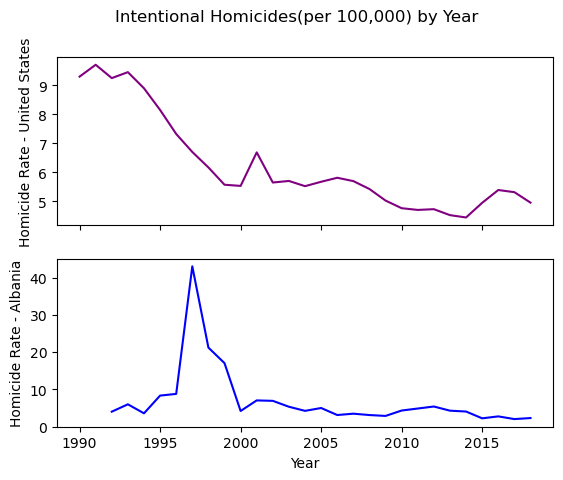

In [12]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('Intentional Homicides(per 100,000) by Year')
axs[0].plot(df_usa["year"],df_usa["Intentional homicides (per 100,000 people)"], color='purple')
axs[1].plot(df_alb ["year"], df_alb["Intentional homicides (per 100,000 people)"], color='blue')
axs[0].set_ylabel("Homicide Rate - United States")
axs[1].set_ylabel("Homicide Rate - Albania")
plt.xlabel("Year")

plt.show()

## Intentional Homicide Rate(per 100,0000 people) in the year 2000 by country

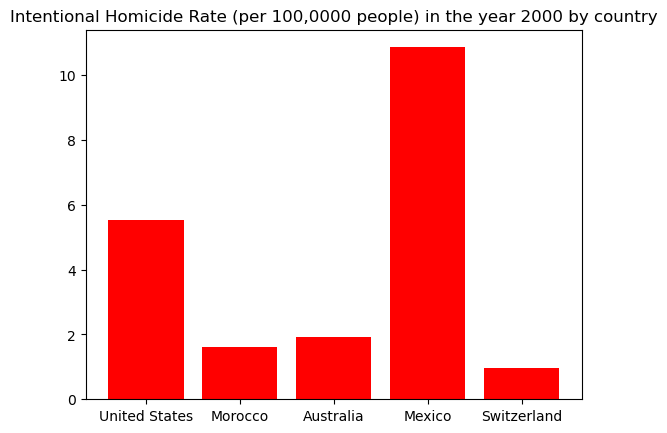

In [13]:
countries=["United States","Morocco","Australia","Mexico", "Switzerland"]
df2000 = df[df['year']==2000]

values = []

for country in countries:
    values.append(df2000[df2000['country']==country]["Intentional homicides (per 100,000 people)"].values[0])
    
values

plt.bar(countries, values, color='red')
plt.title("Intentional Homicide Rate (per 100,0000 people) in the year 2000 by country")
plt.show()

# Conclusion 

It is apparent throughout the data report that there is a correlation between income (GDP per capita) and suicide (suicide mortality rate). Studies have shown that adults with lower incomes experience depression at a higher rate than adults with high incomes, leading countries with larger lower-income populations to have higher suicide rates. The data presented also shows that, in general, intentional homicides are decreasing while suicides are becoming more frequent across the world.